PREPARATION OF NOTEBOOK, DF AND VARIABLES

Import Modules and Libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

Import DF

In [45]:
BGG_df = pd.read_csv('/Users/nickkempe/Documents/GitHub/WORK_FILE_ds_ft_sep_22/2-Data_Analysis/Entregas/EDA/BGG/all_final/BGG_full_2022_11_01.csv')

Category Count

In [110]:
BGG_df["categories"] = BGG_df['categories'].str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"','')

for i in BGG_df["categories"]:
    BGG_df["categories"] = BGG_df["categories"].str.strip()

CAT_count = BGG_df['categories'].str.get_dummies(',')

CAT_count.columns = CAT_count.columns.str.strip()

topcat = CAT_count.sum(axis=0).sort_values(ascending=False).head(40)

print(topcat.head(3))

numcat = CAT_count.sum(axis=1)

BGG_df["numcat"] = numcat

Card Game    280
Fantasy      255
Fighting     194
dtype: int64


In [111]:
print(topcat.head(40))

Card Game                    280
Fantasy                      255
Fighting                     194
Science Fiction              178
Adventure                    145
Economic                     134
Miniatures                   128
Economic                     126
Exploration                  124
Card Game                    120
Wargame                      115
Medieval                     110
Territory Building           104
Ancient                       85
Animals                       77
Bluffing                      75
City Building                 73
Abstract Strategy             72
Horror                        71
Deduction                     71
Political                     69
Party Game                    66
Puzzle                        65
Novel-based                   64
Industry / Manufacturing      63
Dice                          63
Dice                          61
City Building                 61
Fantasy                       59
Negotiation                   57
Mythology 

In [119]:
#card game 280 + 120 = 400
topcat.index[0] == topcat.index[9]

True

In [116]:
#fantasy 255 + 59 = 314
topcat.index[1] == topcat.index[28]

True

In [120]:
#dice 63 + 61 = 124
topcat.index[25] == topcat.index[26]

True

In [123]:
#deduction 38 + 71 = 109
topcat.index[19] == topcat.index[39]

True

Mechanics Count

In [103]:
BGG_df["mechanics"] = BGG_df["mechanics"].replace(regex=['Deck, Bag, and Pool Building'],value='Deck Bag and Pool Building')
BGG_df["mechanics"] = BGG_df["mechanics"].replace(regex=['I Cut, You Choose'],value='I Cut You Choose')
BGG_df["mechanics"] = BGG_df["mechanics"].replace(regex=['Worker Placement, Different Worker Types'],value='Worker Placement Different Worker Types')


BGG_df["mechanics"] = BGG_df['mechanics'].str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"','')

BGG_df["mechanics"] = BGG_df["mechanics"].str.lstrip()
BGG_df["mechanics"] = BGG_df["mechanics"].str.rstrip()
BGG_df["mechanics"] = BGG_df["mechanics"].str.strip()

MECH_count = BGG_df['mechanics'].str.get_dummies(',')
MECH_count.columns = MECH_count.columns.str.strip()
MECH_count.columns = MECH_count.columns.str.lstrip()
MECH_count.columns = MECH_count.columns.str.rstrip()

topmech = MECH_count.sum(axis=0).sort_values(ascending=False).head(40)

print(topmech.head(3))

nummech = MECH_count.sum(axis=1)

BGG_df["nummech"] = nummech

Variable Player Powers    458
Hand Management           456
Dice Rolling              351
dtype: int64


In [104]:
print(topmech.head(40))
#dice rolling puto repe
#hand management tb

Variable Player Powers                458
Hand Management                       456
Dice Rolling                          351
Set Collection                        332
Open Drafting                         295
Solo / Solitaire Game                 284
Modular Board                         246
Tile Placement                        219
Area Majority / Influence             209
Worker Placement                      183
Action Points                         169
Grid Movement                         149
Variable Set-up                       132
Simultaneous Action Selection         129
Cooperative Game                      128
Take That                             125
Team-Based Game                       119
Dice Rolling                          116
Cooperative Game                      113
Hexagon Grid                          113
Point to Point Movement               104
Area Movement                         104
Network and Route Building            100
Hand Management                   

In [109]:
#dice rolling 351 + 116 = 467
topmech.index[17] == topmech.index[2]

True

In [108]:
#hand management 456 + 99 = 555
topmech.index[23] == topmech.index[1]

True

Drop Non-revelant Variables

In [48]:
BGG_df.keys()

Index(['game_id', 'name', 'ranking', 'expansion', 'accessory', 'categories',
       'mechanics', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'usersrate', 'average',
       'bayesaverage', 'stddev', 'numcomments', 'numweights', 'averageweight',
       'votes_suggested_players', 'recom_plyrs_int', 'votes_best_players',
       'langdep', 'avgprice', 'numcat', 'nummech'],
      dtype='object')

In [49]:
print(BGG_df.game_id[0])                            #unique ID from BGG
print(BGG_df.name[0])                               #official name in English
print(BGG_df.ranking[0])                            #ranking position on 2022-11-01
print(BGG_df.expansion[0])                          #boolean. There are no expansions on the ranking list
print(BGG_df.accessory[0])                          #boolean. There are no accessories on the ranking list
print(BGG_df.categories[0])                         #All the categories a game belongs to
print(BGG_df.mechanics[0])                          #All the mechanics a game has
print(BGG_df.yearpublished[0])                      #Year of publication of verion on list
print(BGG_df.minplayers[0])                         #Official suggested min players
print(BGG_df.maxplayers[0])                         #Official suggested max players
print(BGG_df.playingtime[0])                        #Viene del library. Parece ser el max time, pero podria ser algo votado
print(BGG_df.minplaytime[0])                        #Official suggested min time
print(BGG_df.maxplaytime[0])                        #Official suggested max time
print(BGG_df.minage[0])                             #Min suggested age
print(BGG_df.usersrate[0])                          #Number of ratings
print(BGG_df.average[0])                            #Average rating
print(BGG_df.averageweight[0])                      #Average weight
print(BGG_df.votes_suggested_players[0])            #Total votes for suggested players
print(BGG_df.recom_plyrs_int[0])                    #Cleaned up suggested players count. Most votes as best
print(BGG_df.votes_best_players[0])                 #Number of votes for resultant recom_plyrs_int
print(BGG_df.langdep[0])                            #Language dependence as a cualitative value. Can you play this in another language?
print(BGG_df.avgprice[0])                           #Average of all USD prices in BGG complier
print(BGG_df.numcat[0])                             #Number of categories this game pertains too
print(BGG_df.nummech[0])                            #Number of mechanics this game employs


174430
Gloomhaven
1
False
False
Adventure, Exploration, Fantasy, Fighting, Miniatures
Action Queue, Action Retrieval, Campaign / Battle Card Driven, Card Play Conflict Resolution, Communication Limits, Cooperative Game, Critical Hits and Failures, Deck Construction, Grid Movement, Hand Management, Hexagon Grid, Legacy Game, Line of Sight, Modular Board, Once-Per-Game Abilities, Role Playing, Scenario / Mission / Campaign Game, Simultaneous Action Selection, Solo / Solitaire Game, Storytelling, Variable Player Powers
2017
1
4
120
60
120
14
52915
8.68839
3.8884
1370
3
666
Extensive use of text - massive conversion needed to be playable
116.46
5
21


In [50]:
BGG_df.drop('game_id', axis = 1, inplace = True)
BGG_df.drop('expansion', axis = 1, inplace = True)
BGG_df.drop('accessory', axis = 1, inplace = True)
BGG_df.drop('minplayers', axis = 1, inplace = True)
BGG_df.drop('maxplayers', axis = 1, inplace = True)
BGG_df.drop('minplaytime', axis = 1, inplace = True)
BGG_df.drop('maxplaytime', axis = 1, inplace = True)
BGG_df.drop('votes_suggested_players', axis = 1, inplace = True)
BGG_df.drop('votes_best_players', axis = 1, inplace = True)

Convert langdep to integer

In [51]:
langdeptemp = {}
langdeptemp = BGG_df["langdep"].copy()
langdepset = set(langdeptemp)

In [9]:
langdepset

{'(no votes)',
 'Extensive use of text - massive conversion needed to be playable',
 'Moderate in-game text - needs crib sheet or paste ups',
 'No necessary in-game text',
 'Some necessary text - easily memorized or small crib sheet',
 'Unplayable in another language'}

In [52]:
langdeplegend = {
    "1": "No necessary in-game text",
    "2": "Some necessary text - easily memorized or small crib sheet",
    "3": "Moderate in-game text - needs crib sheet or paste ups",
    "4": "Extensive use of text - massive conversion needed to be playable",
    "5": "Unplayable in another language"
}

In [53]:
list(langdeplegend.keys())[list(langdeplegend.values()).index('Extensive use of text - massive conversion needed to be playable')]

'4'

In [54]:
langdepint = []
for dep in BGG_df["langdep"]:
    if dep in langdeplegend.values():
        langdepint.append(list(langdeplegend.keys())[list(langdeplegend.values()).index(dep)])
    else:
        langdepint.append(0)
print(len(langdepint))
langdepint[0:3]

1500


['4', '1', '4']

In [55]:
langdepint = [int(i) for i in langdepint]

In [56]:
BGG_df.drop('langdep', axis = 1, inplace = True)
BGG_df["langdep"] = langdepint

In [57]:
type(BGG_df["langdep"][0])

numpy.int64

Save DF with all integer values

In [59]:
BGG_df.to_csv("BGG_finaldf_from_BGG20221101.csv", index=False)

Further cleaning?

In [60]:
BGG_df.describe()
#year published has a negative value

ranking  yearpublished  playingtime       minage      usersrate  \
count  1500.000000    1500.000000  1500.000000  1500.000000    1500.000000   
mean    750.500000    2006.878667    89.930000    11.401333    8969.297333   
std     433.157015     123.155986    91.278027     2.315421   12135.218490   
min       1.000000   -2200.000000     0.000000     0.000000     782.000000   
25%     375.750000    2010.000000    45.000000    10.000000    2692.750000   
50%     750.500000    2015.000000    60.000000    12.000000    4630.500000   
75%    1125.250000    2018.000000   120.000000    13.000000    9965.500000   
max    1500.000000    2022.000000  1200.000000    18.000000  114792.000000   

           average  bayesaverage       stddev   numcomments   numweights  \
count  1500.000000   1500.000000  1500.000000   1500.000000  1500.000000   
mean      7.417726      6.819897     1.341806   1744.408667   433.630000   
std       0.421842      0.404746     0.165649   2008.648078   675.226252   
min       6.501130      6.322210     1.022000    113.000000     8.000000   
25%       7.109260      6.498223     1.219588    625.750000    96.750000   
50%       7.382580      6.718065     1.311365   1062.000000   213.000000   
75%       7.687620      7.051095     1.435782   2052.250000   485.750000   
max       9.261090      8.457300     2.205890  20286.000000  7887.000000   

       averageweight  recom_plyrs_int     avgprice      numcat      nummech  \
count    1500.000000      1500.000000  1478.000000  1500.00000  1500.000000   
mean        2.559414         3.406667    69.131922     3.11400     5.779333   
std         0.799834         1.390891    77.924302     1.55819     2.880539   
min         1.022200         1.000000     3.000000     0.00000     0.000000   
25%         2.010350         2.000000    31.725000     2.00000     4.000000   
50%         2.500000         3.000000    48.330000     3.00000     5.000000   
75%         3.096450         4.000000    79.922500     4.00000     7.000000   
max         4.833300        15.000000  1199.990000    10.00000    21.000000   

           langdep  
count  1500.000000  
mean      2.265333  
std       1.212674  
min       0.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max       5.000000

In [61]:
BGG_df.loc[BGG_df["yearpublished"] == BGG_df["yearpublished"].min()]
#hahahaha pon esta pagina One Claim: Emperor Yao (ruled 2357-2256 BC) created the game

name  ranking         categories               mechanics  yearpublished  \
187   Go      188  Abstract Strategy  Enclosure, Square Grid          -2200   

     playingtime  minage  usersrate  average  bayesaverage   stddev  \
187          180       8      16105  7.64114       7.31876  1.90715   

     numcomments  numweights  averageweight  recom_plyrs_int  avgprice  \
187         3951        1538         3.9369                2     19.49   

     numcat  nummech  langdep  
187       1        2        1

ANALISIS

In [62]:
BGG_df.corr()

ranking  yearpublished  playingtime    minage  usersrate  \
ranking          1.000000       0.008848    -0.083177 -0.162448  -0.509799   
yearpublished    0.008848       1.000000    -0.013972  0.111554  -0.021673   
playingtime     -0.083177      -0.013972     1.000000  0.298811  -0.070219   
minage          -0.162448       0.111554     0.298811  1.000000  -0.076121   
usersrate       -0.509799      -0.021673    -0.070219 -0.076121   1.000000   
average         -0.524722       0.019303     0.335601  0.361468   0.075744   
bayesaverage    -0.941694      -0.008981     0.115040  0.185484   0.581900   
stddev          -0.035524      -0.152129     0.375433  0.308875   0.007825   
numcomments     -0.484909      -0.046811    -0.047857 -0.084193   0.970645   
numweights      -0.410774      -0.065338     0.018522 -0.053796   0.885467   
averageweight   -0.234709      -0.024080     0.534495  0.526453  -0.069737   
recom_plyrs_int -0.002694      -0.009771    -0.030284 -0.051955   0.085380   
avgprice        -0.067248       0.021104     0.246464  0.231270  -0.088251   
numcat          -0.096694       0.054602     0.166510  0.203834   0.063716   
nummech         -0.390282       0.064590     0.237646  0.324255   0.238164   
langdep         -0.090271       0.055519     0.252306  0.335063  -0.024937   

                  average  bayesaverage    stddev  numcomments  numweights  \
ranking         -0.524722     -0.941694 -0.035524    -0.484909   -0.410774   
yearpublished    0.019303     -0.008981 -0.152129    -0.046811   -0.065338   
playingtime      0.335601      0.115040  0.375433    -0.047857    0.018522   
minage           0.361468      0.185484  0.308875    -0.084193   -0.053796   
usersrate        0.075744      0.581900  0.007825     0.970645    0.885467   
average          1.000000      0.584545  0.186662     0.008848    0.037326   
bayesaverage     0.584545      1.000000  0.053896     0.538139    0.470847   
stddev           0.186662      0.053896  1.000000     0.061470    0.103651   
numcomments      0.008848      0.538139  0.061470     1.000000    0.943644   
numweights       0.037326      0.470847  0.103651     0.943644    1.000000   
averageweight    0.526884      0.277755  0.440377    -0.049751    0.073505   
recom_plyrs_int -0.187200     -0.018440  0.114458     0.095412    0.077772   
avgprice         0.279983      0.063004  0.330661    -0.069037   -0.028987   
numcat           0.165180      0.112408  0.327394     0.060801    0.042055   
nummech          0.409647      0.445932  0.216932     0.226838    0.210362   
langdep          0.283472      0.110034  0.404830    -0.031065   -0.042416   

                 averageweight  recom_plyrs_int  avgprice    numcat   nummech  \
ranking              -0.234709        -0.002694 -0.067248 -0.096694 -0.390282   
yearpublished        -0.024080        -0.009771  0.021104  0.054602  0.064590   
playingtime           0.534495        -0.030284  0.246464  0.166510  0.237646   
minage                0.526453        -0.051955  0.231270  0.203834  0.324255   
usersrate            -0.069737         0.085380 -0.088251  0.063716  0.238164   
average               0.526884        -0.187200  0.279983  0.165180  0.409647   
bayesaverage          0.277755        -0.018440  0.063004  0.112408  0.445932   
stddev                0.440377         0.114458  0.330661  0.327394  0.216932   
numcomments          -0.049751         0.095412 -0.069037  0.060801  0.226838   
numweights            0.073505         0.077772 -0.028987  0.042055  0.210362   
averageweight         1.000000        -0.133962  0.304948  0.152568  0.395849   
recom_plyrs_int      -0.133962         1.000000  0.007413  0.148507 -0.006892   
avgprice              0.304948         0.007413  1.000000  0.217107  0.185834   
numcat                0.152568         0.148507  0.217107  1.000000  0.276411   
nummech               0.395849        -0.006892  0.185834  0.276411  1.000000   
langdep               0.203992        -0.100402  0.159513  0.324320 

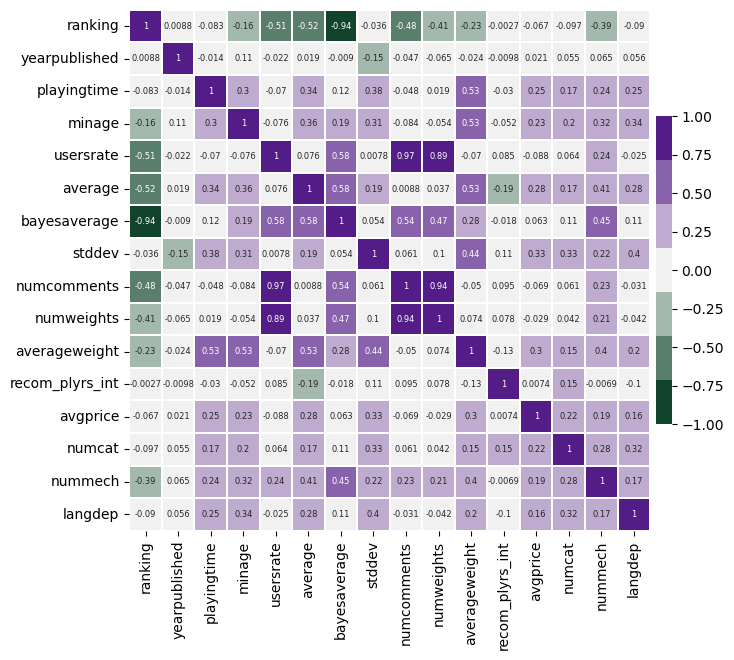

In [71]:
plt.figure(figsize=(8,8))
sns.color_palette("colorblind")
sns.heatmap(BGG_df.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            #cbar_kws={"shrink": 0.5},
            cbar_kws=dict(use_gridspec=False,location="right",pad=0.01,shrink=0.5),
            square=True,
            linewidths=.1,
            annot=True,
            annot_kws={"size":6});

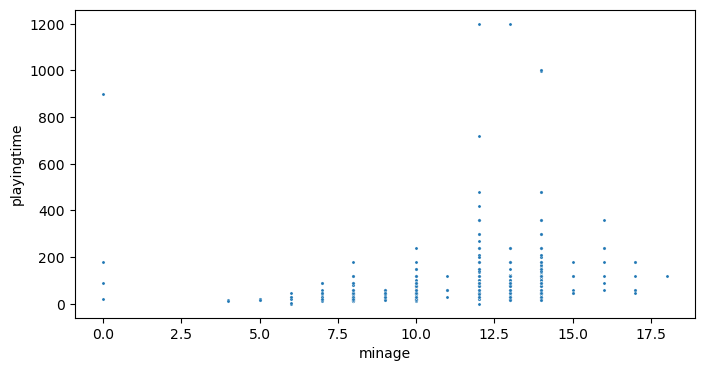

In [21]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=BGG_df['minage'],
            y=BGG_df['playingtime'],
            s=5);           

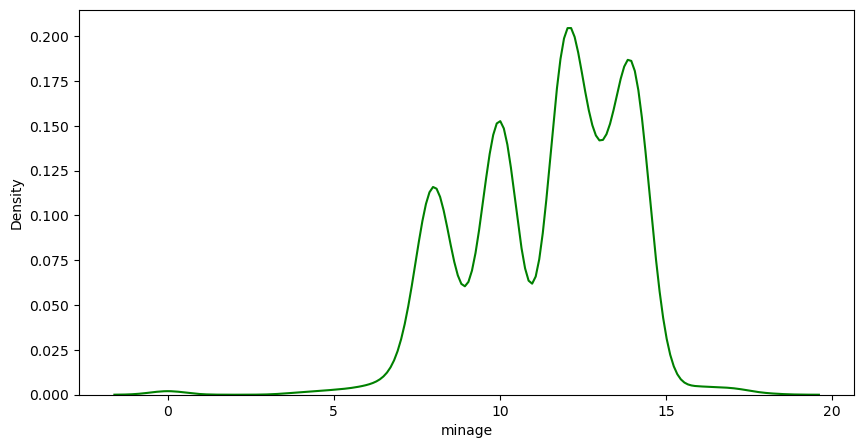

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(BGG_df["minage"],
             #kde=False,
             color='g',
             hist = False);

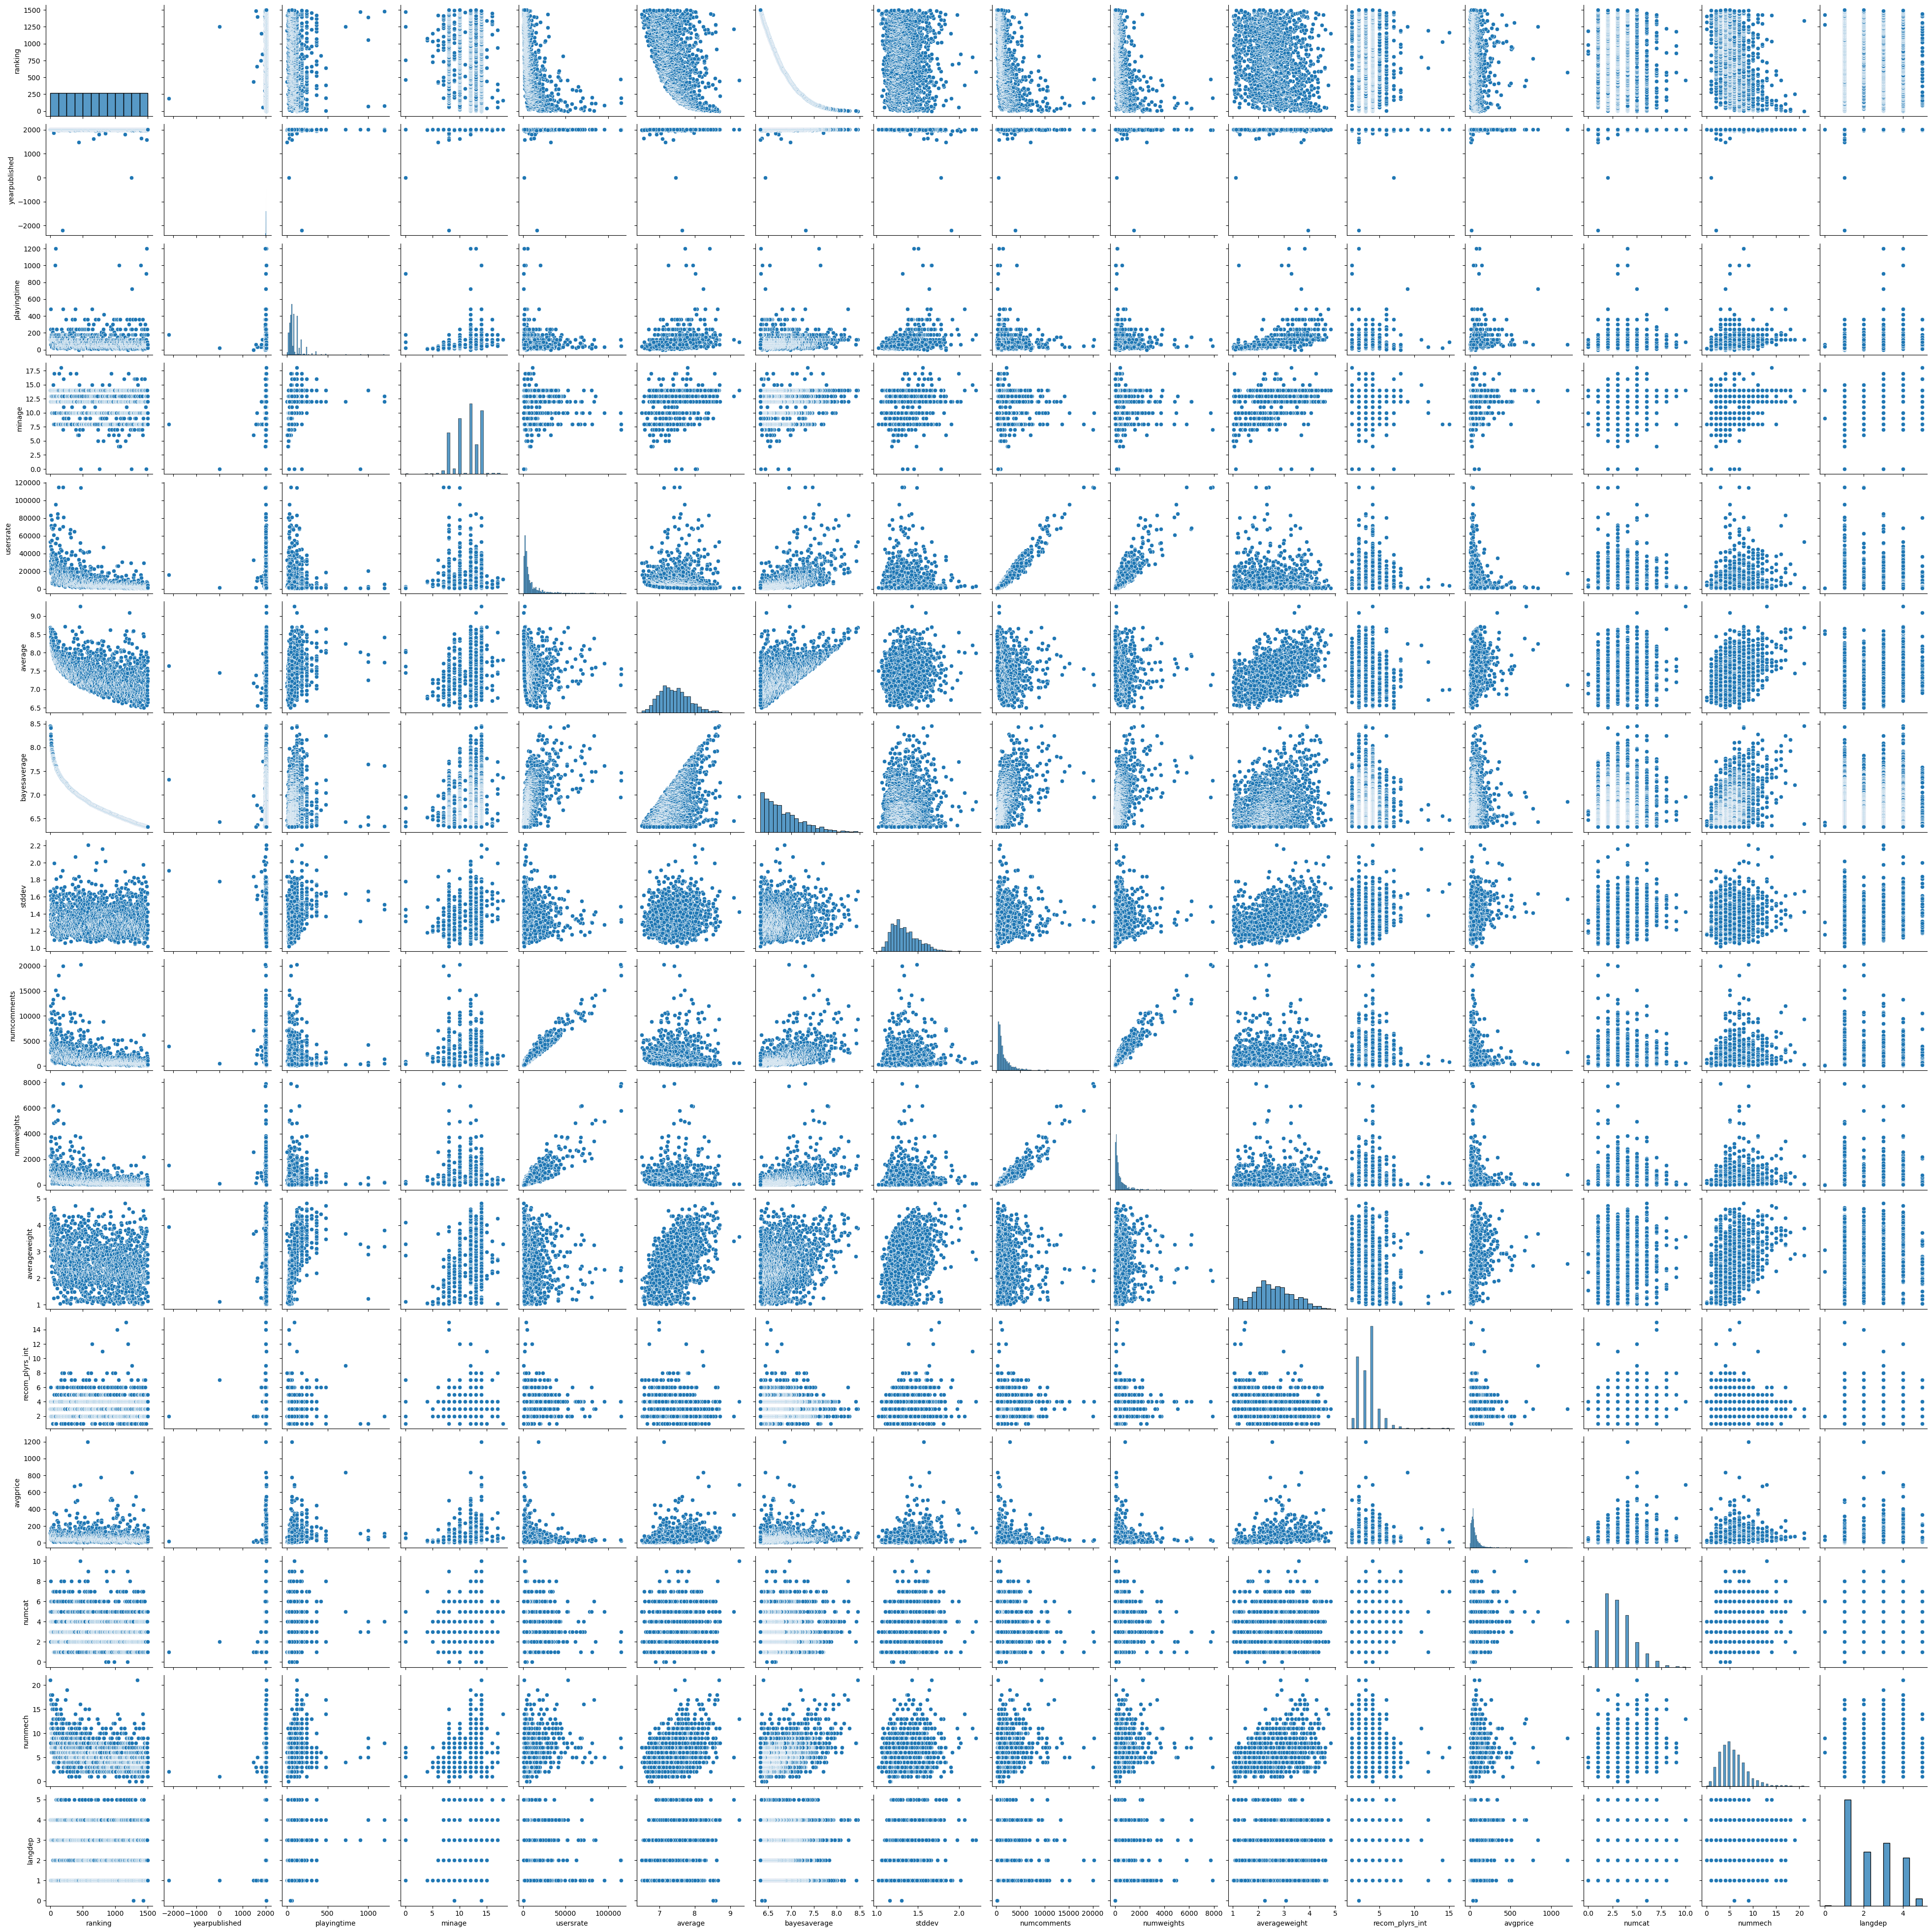

In [23]:
sns.pairplot(BGG_df);

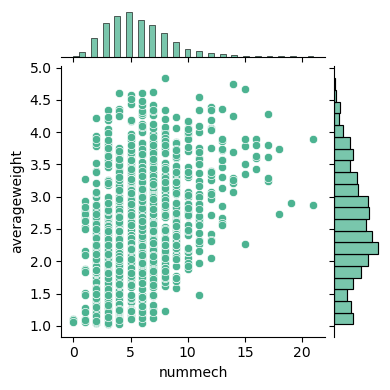

In [36]:
sns.jointplot(x=BGG_df['nummech'],
              y=BGG_df['averageweight'],
              color="#4CB391",
             height = 4);

#four plots nummech, numcat and langdep vs weight, rating and playtime

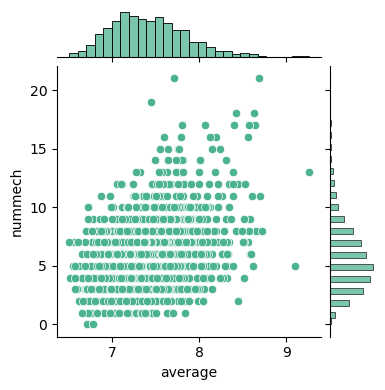

In [39]:
sns.jointplot(x=BGG_df['average'],
              y=BGG_df['nummech'],
              color="#4CB391",
             height = 4);

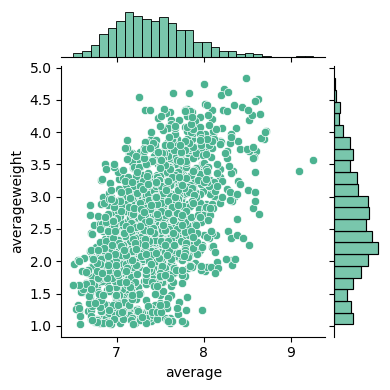

In [40]:
sns.jointplot(x=BGG_df['average'],
              y=BGG_df['averageweight'],
              color="#4CB391",
             height = 4);

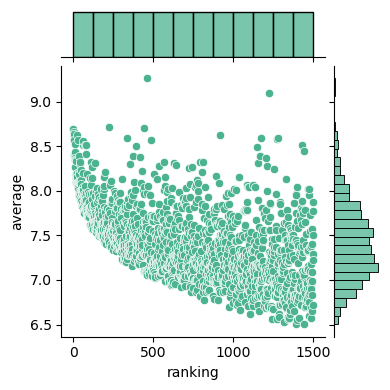

In [42]:
sns.jointplot(x=BGG_df['ranking'],
              y=BGG_df['average'],
              color="#4CB391",
             height = 4);

In [43]:
BGG_df.loc[BGG_df["average"] == BGG_df["average"].max()]

name  ranking  \
459  Oathsworn: Into the Deepwood      460   

                                            categories  \
459  Adventure, Card Game, Dice, Exploration, Fanta...   

                                             mechanics  yearpublished  \
459  Action Points, Card Play Conflict Resolution, ...           2022   

     playingtime  minage  usersrate  average  bayesaverage   stddev  \
459           90      14       1722  9.26109       6.95895  1.42575   

     numcomments  numweights  averageweight  recom_plyrs_int  avgprice  \
459          614          82         3.5732                4     690.0   

     numcat  nummech  langdep  
459      10       13        4

In [131]:
trace1 =go.Scatter(
                    x = BGG_df["ranking"],
                    y = BGG_df["bayesaverage"],
                    mode = "lines",
                    name = "Bayes Average",
                    #marker = dict(color = 'green'),
                    marker = dict(color = 'rgba(95, 158, 160, 0.8)'),
                    text= BGG_df["bayesaverage"])
# creating trace2
trace2 =go.Scatter(
                    x = BGG_df["ranking"],
                    y = BGG_df["average"],
                    mode = "lines",
                    name = "2015",
                    #marker = dict(color = 'blue'),
                    marker = dict(color = 'rgba(100, 149, 237, 0.8)'),
                    text= BGG_df["average"])

data = [trace1, trace2]

layout = dict(title = 'Promedio y Promedio Bayesnesiano por Ranking',
              xaxis= dict(title= 'Ranking',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Valoracion',ticklen= 5,zeroline= False)
             )

#fig = dict(data = data, layout = layout)
fig = go.Figure(data = data, layout=layout)

display(fig)

Hipotesis BGG: Year Published

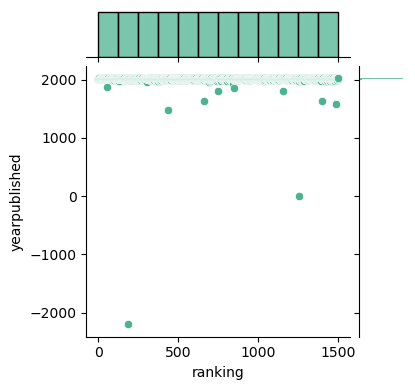

In [132]:
sns.jointplot(x=BGG_df['ranking'],
              y=BGG_df['yearpublished'],
              color="#4CB391",
             height = 4);

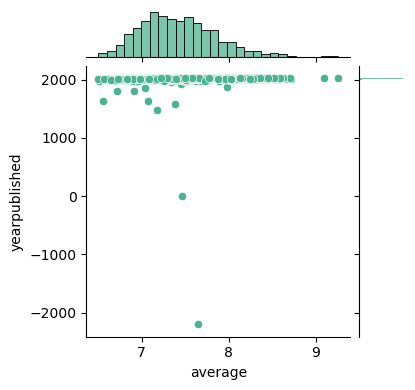

In [133]:
sns.jointplot(x=BGG_df['average'],
              y=BGG_df['yearpublished'],
              color="#4CB391",
             height = 4);

In [138]:
trace1 =go.Scatter(
                    x = BGG_df["ranking"],
                    y = BGG_df["yearpublished"],
                    mode = "markers",
                    name = "yearpublished",
                    marker = dict(color = 'rgba(95, 158, 160, 0.8)')
)


data = [trace1]

layout = dict(title = 'Year Published v Ranking (zoomed)',
              xaxis= dict(title= 'Ranking',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Year Published',ticklen= 5,zeroline= False)
             )

#fig = dict(data = data, layout = layout)
fig = go.Figure(data = data, layout=layout, layout_yaxis_range=[1990,2025])

display(fig)

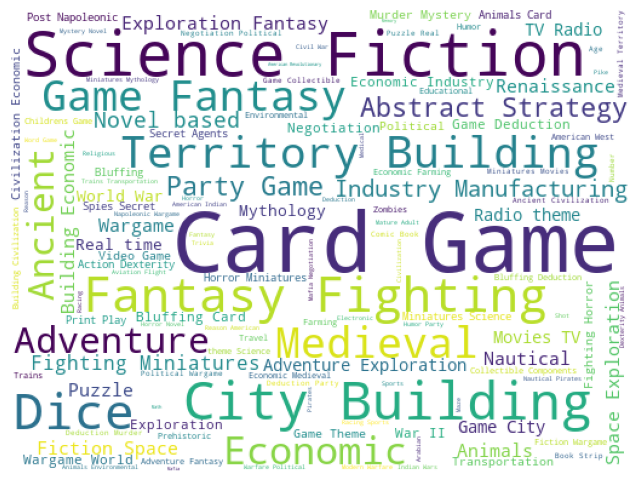

In [27]:
#x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(BGG_df["categories"]))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('graph.png')

plt.show()

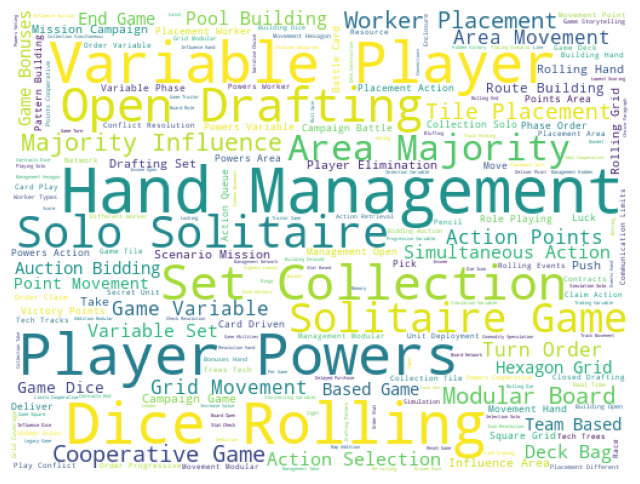

In [28]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(BGG_df["mechanics"]))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('graph.png')

plt.show()